# Week 2

## Statistical Analysis

Points: 

1- We have exercises and questions, so you should start to write your own codes. 

2- All the purpose is learning, so please ask questions that we can help you.

3- Do the exercises and then help your team members also. It's an interactive work. 

In [4]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('/Users/bonakdar/Desktop/University/MDST/heart_failure_clinical_records_dataset.csv') #make sure to replace with your data directory
#df.drop(columns=['time'],inplace=True) #drop the time column which is not one of the informative features 
df_features = df.iloc[:,:-1]
df_target = df['DEATH_EVENT']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bonakdar/Desktop/University/MDST/heart_failure_clinical_records_dataset.csv'

In [ ]:
df_features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
df_target

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

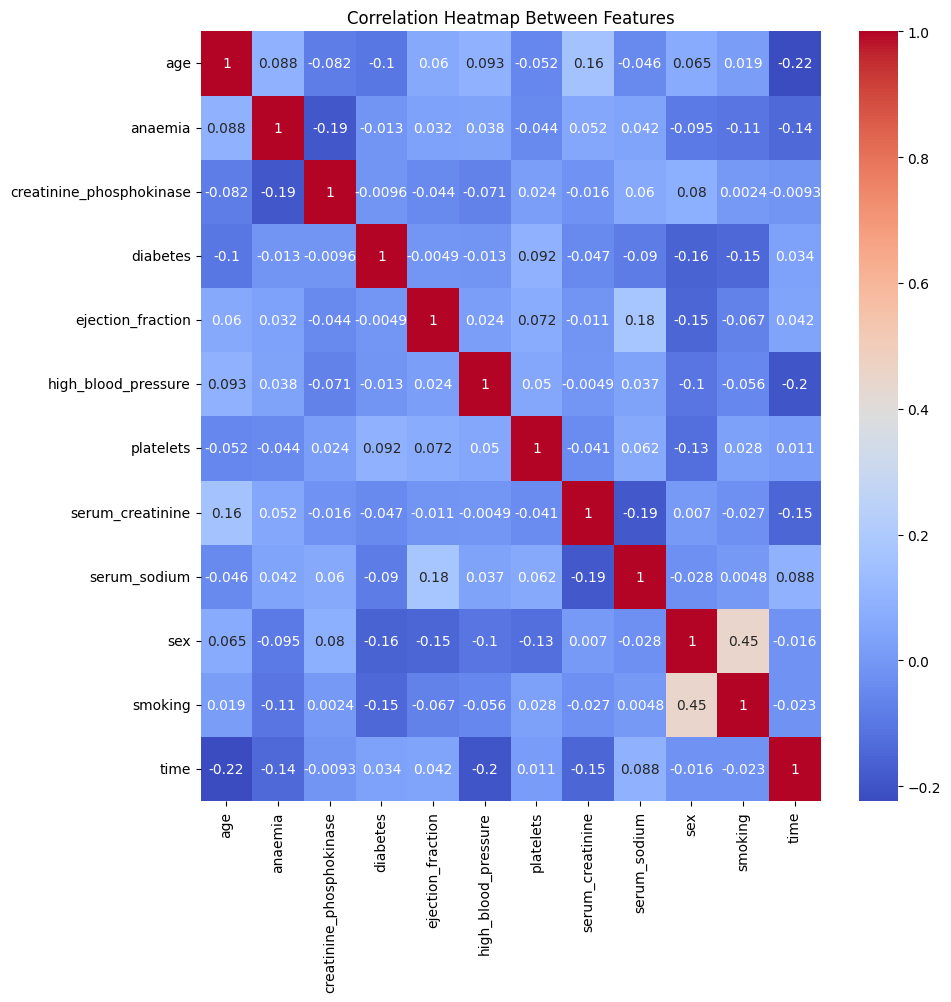

<Figure size 640x480 with 0 Axes>

In [ ]:
#correlation
correlation = df_features.corr()
correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
# Set the title
plt.title('Correlation Heatmap Between Features')

# Save the heatmap to a file
#plt.savefig('/Users/bonakdar/Desktop/correlation_heatmap.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


# Clear the plotting context to avoid replotting issues in some environments
plt.clf()

In [ ]:
df_features.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608


# Question: What is the next step you think we should take?






















# Exercise: Measure the correlation of the features with the output and visualize it. 

Hint: You can use pearsonr from scipy.stats and horizontal bar plots for visualizing the correlation of the features

In [ ]:
#Write your code here






















In [ ]:
#correlation of the features with the output 

from scipy.stats import pearsonr
features = []
correlations = []
p_values = []
target_variable = 'DEATH_EVENT'
for column in df.columns:
    if column != target_variable:
        corr, p_val = pearsonr(df[column], df[target_variable])
        features.append(column)
        correlations.append(corr)
        p_values.append(p_val)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Feature': features,
    'Pearson Correlation': correlations,
    'P-value': p_values
})
# Sort the results by absolute correlation values (or otherwise as needed)
results_df_sorted = results_df.sort_values(by='Pearson Correlation', ascending=False)
# Print the sorted results
#results_df_sorted.to_csv('/Users/bonakdar/Desktop/2_3.csv')
results_df_sorted

,Feature,Pearson Correlation,P-value
7,serum_creatinine,0.294278,2.190198e-07
0,age,0.253729,8.916763e-06
5,high_blood_pressure,0.079351,1.711495e-01
1,anaemia,0.066270,2.532988e-01
2,creatinine_phosphokinase,0.062728,2.796112e-01
3,diabetes,-0.001943,9.733118e-01
9,sex,-0.004316,9.407519e-01
10,smoking,-0.012623,8.279207e-01
6,platelets,-0.049139,3.971942e-01
8,serum_sodium,-0.195204,6.889112e-04


<BarContainer object of 12 artists>

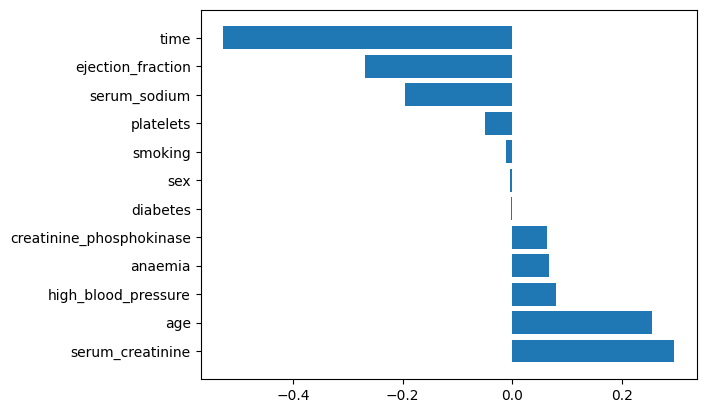

In [ ]:
plt.barh(results_df_sorted['Feature'], results_df_sorted['Pearson Correlation'])

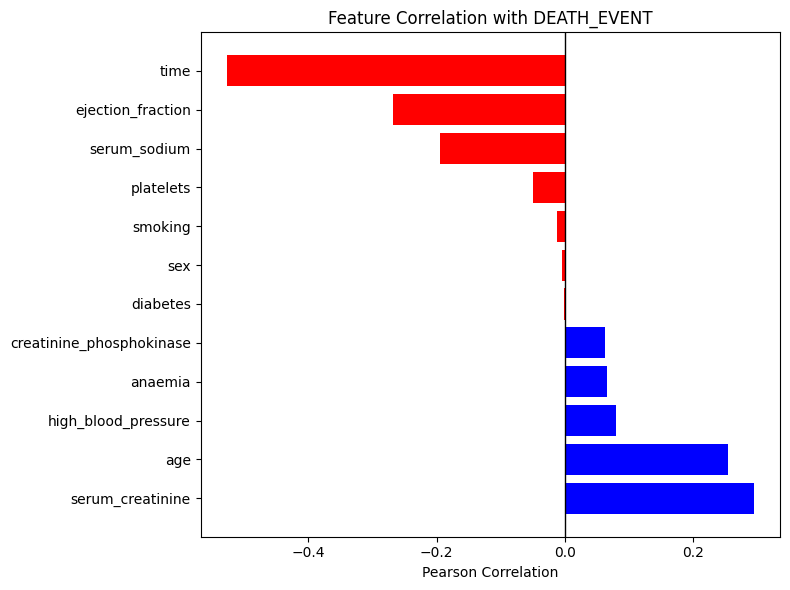

In [ ]:
#Visualize the correlation
import numpy as np
import matplotlib.pyplot as plt


colors = ['red' if c < 0 else 'blue' for c in results_df_sorted['Pearson Correlation']]

plt.figure(figsize=(8, 6))
plt.barh(results_df_sorted['Feature'], results_df_sorted['Pearson Correlation'], color=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title('Feature Correlation with DEATH_EVENT')
plt.xlabel('Pearson Correlation')
plt.tight_layout()
plt.show()


# Question: What do you think about most important features? 

In [ ]:
# Separate the groups based on the Event column
from scipy.stats import ttest_ind

survived_group = df[df['DEATH_EVENT'] == 0]
death_group = df[df['DEATH_EVENT'] == 1]

# Initialize a dictionary to store results
results = {'Feature': [], 'T-Statistic': [], 'P-Value': []}

# Iterate over each numerical column except 'Event' 
numerical_columns = df.select_dtypes(include=[np.number]).columns.drop(['DEATH_EVENT'])

for column in numerical_columns:
    t_stat, p_value = ttest_ind(survived_group[column], death_group[column], equal_var=False)
    results['Feature'].append(column)
    results['T-Statistic'].append(t_stat)
    results['P-Value'].append(p_value)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
#results_df.set_index('Feature', inplace=True)

# Print the results DataFrame
#results_df.to_csv('/Users/bonakdar/Desktop/2_33.csv')
results_df

,Feature,T-Statistic,P-Value
0,age,-4.186210,4.735215e-05
1,anaemia,-1.136898,2.570643e-01
2,creatinine_phosphokinase,-0.901190,3.692160e-01
3,diabetes,0.033458,9.733450e-01
4,ejection_fraction,4.566983,9.647153e-06
5,high_blood_pressure,-1.347390,1.795643e-01
6,platelets,0.844785,3.993231e-01
7,serum_creatinine,-4.152639,6.398962e-05
8,serum_sodium,3.164501,1.872325e-03
9,sex,0.074238,9.409014e-01


# Exercise: Write a python function that returns a list including the features with significant P-value. This function should get 2 inputs: a dataframe (results_df) and a threshold

In [ ]:
#Write your code here






























# Exercise: Write a python function to do mannwhitneyu test: 

hint: from scipy.stats import mannwhitneyu for all features

mannwhitneyu(survived_group['serum_creatinine'], death_group['serum_creatinine'])

In [ ]:
#Write your code here














# Question: Is this enough to just perform the ttest or mannwhitney test?

In [ ]:
#Adjust p-vals based on multiple hypothesis tests (Benjamini Hochberg: FDR)
from statsmodels.stats.multitest import multipletests

# Get p-values
pvals = results_df['P-Value'].values
fdr  = multipletests(pvals, method='fdr_bh')

# Add to dataframe
results_df['p_fdr_bh'] = fdr[1]

# Significance flags
results_df['significant_fdr'] = results_df['p_fdr_bh'] < 0.05

results_df.sort_values('p_fdr_bh')

,Feature,T-Statistic,P-Value,p_fdr_bh,significant_fdr
11,time,11.006168,2.343276e-22,2.811931e-21,True
4,ejection_fraction,4.566983,9.647153e-06,5.788292e-05,True
0,age,-4.186210,4.735215e-05,1.894086e-04,True
7,serum_creatinine,-4.152639,6.398962e-05,1.919689e-04,True
8,serum_sodium,3.164501,1.872325e-03,4.493580e-03,True
5,high_blood_pressure,-1.347390,1.795643e-01,3.591286e-01,False
1,anaemia,-1.136898,2.570643e-01,4.406817e-01,False
2,creatinine_phosphokinase,-0.901190,3.692160e-01,5.324308e-01,False
6,platelets,0.844785,3.993231e-01,5.324308e-01,False
3,diabetes,0.033458,9.733450e-01,9.733450e-01,False


# Feature Importance & Variance Analysis

## 1. Random Forest Feature Importance

Machine learning models can rank features by their predictive power.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

print("Top 5 Features:")
importance_df.sort_values('Importance', ascending=False).head()

## 2. Feature Variance Analysis

Features with very low variance may not be useful for prediction.

In [ ]:
# Variance and Coefficient of Variation (CV = std/mean)
from sklearn.preprocessing import StandardScaler

variance_df = pd.DataFrame({
    'Feature': X.columns,
    'Variance': X.var(),
    'Std': X.std(),
    'Mean': X.mean(),
    'CV': X.std() / X.mean()  # Coefficient of variation
}).sort_values('Variance', ascending=False)

print("Feature Variance Summary:")
print("CV (Coefficient of Variation) = Std/Mean - higher means more spread relative to mean\n")
variance_df

## 3. Exercise Solutions

In [ ]:
# Solution: Get significant features function
def get_significant_features(results_df, threshold=0.05):
    return results_df[results_df['P-Value'] < threshold]['Feature'].tolist()

print("Significant features (p<0.05):", get_significant_features(results_df, 0.05))

In [ ]:
# Solution: Mann-Whitney U test for all features
from scipy.stats import mannwhitneyu

mw_results = []
for col in df.select_dtypes(include=[np.number]).columns.drop(['DEATH_EVENT']):
    u_stat, p_val = mannwhitneyu(survived_group[col], death_group[col], alternative='two-sided')
    mw_results.append({'Feature': col, 'U-Statistic': u_stat, 'P-Value': p_val})

mw_df = pd.DataFrame(mw_results).sort_values('P-Value')
mw_df['Significant'] = mw_df['P-Value'] < 0.05
mw_df